## Numpy

In [3]:
import numpy as np

### Zadanie 1.

Stwórz losową tablicę 10,000 liczb, następnie do każdego elementu dodaj 1. Następnie napisz dokładnie tę samą funkcję używając `numpy` i jego tablic. Porównaj czas działania swoich rozwiązań.

In [15]:
import random
def fun():
    tab = [random.random() for _ in range(10000)]
    return list(map(lambda x: x+1, tab))

In [19]:
def fun_np():
    return np.random.rand(10000) + 1

In [20]:
%%timeit -n 20
fun()

1.68 ms ± 217 µs per loop (mean ± std. dev. of 7 runs, 20 loops each)


In [21]:
%%timeit -n 20
fun_np()

59 µs ± 9.61 µs per loop (mean ± std. dev. of 7 runs, 20 loops each)


### Zadanie 2.

Napisz funkcje obliczajaca $\sin(x) + \cos(x)$ dla kazdego elementu tablicy 10,000 losowych liczb używając pętli oraz używając numpy, porownaj ich szybkość podobnie jak w poprzednim zadaniu.

In [23]:
from math import sin, cos
def fun2():
    tab = [random.random() for _ in range(10000)]
    return list(map(lambda x: sin(x)+cos(x), tab))

In [24]:
def fun2_np():
    tab = np.random.rand(10000)
    return np.sin(tab) + np.cos(tab)

In [25]:
%%timeit -n 20
fun2()

2.86 ms ± 269 µs per loop (mean ± std. dev. of 7 runs, 20 loops each)


In [26]:
%%timeit -n 20
fun2_np()

149 µs ± 9.16 µs per loop (mean ± std. dev. of 7 runs, 20 loops each)


### Zadanie 3.

Napisz wydajniejszą forme następujących funkcji. Dopisz do każdej test potwierdzający szybkość zaproponowanego rozwiązania.

In [27]:
def cube_sum(x):
    """Zwraca sume szescianow elementow"""
    result = 0
    for i in range(len(x)):
        result += x[i] ** 3
    return result

def almost_variance(x):
    """Oblicza 1/n * SUM (x_i - mean(x))^4"""
    m = sum(x) / len(x)
    result = 0
    for i in range(len(x)):
        result += (x[i] - m) ** 4
    result /= len(x)
    return result

In [28]:
def cube_sum_np(x):
    return np.sum(np.power(x,3))

def almost_variance_np(x):
    return np.round(1/len(x) * np.sum(np.power(x-np.mean(x),4)),5)

In [29]:
tab = np.random.randint(0,5,10000)

In [30]:
%%timeit -n 20
cube_sum(tab)
almost_variance(tab)

5.64 ms ± 1.14 ms per loop (mean ± std. dev. of 7 runs, 20 loops each)


In [31]:
%%timeit -n 20
cube_sum_np(tab)
almost_variance_np(tab)

281 µs ± 10.6 µs per loop (mean ± std. dev. of 7 runs, 20 loops each)


### Zadanie 4.

Wykorzystujac `broadcasting` (patrz na rysunek poniżej) stwórz tabliczkę mnożenia tzn. tablice $A$ taka, ze $$A_{ij} = i \cdot j\;\;\;\;\; \forall i,j \in \{1,\dots,10\}$$

Czy potrafisz wykonać to jednym poleceniem, nie używajac przy tym petli/comprehensions?

<img src="http://www.astroml.org/_images/fig_broadcast_visual_1.png">

In [25]:
print(np.arange(1,11) * np.arange(1,11).reshape(-1,1))

[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]


### Zad 5.

Wygeneruj losową tablice `10 x 5`, która będzie reprezentować `10` punktów w `5` wymiarowej przestrzeni. Napisz funkcje, która policzy odleglość euklidesową pomiędzy każdą parą punktów, czy potrafisz zrobić to **bez użycia żadnych pętli/comprehensions**? 

Przypomnienie, dla dwóch wektorów: $x$ i $y$ $$d_{e}(x,y) = \| x - y \|^2_2 = \sum_{i=1}^d (x_i - y_i)^2 $$

In [32]:
def euclidean_norm(tab):
    return np.sum(np.power((tab.reshape(10,1,5) - tab.reshape(1,10,5)),2),axis=2)

In [33]:
tab = np.random.randint(0, 10, 50).reshape(10, 5)
print(euclidean_norm(tab))

[[  0 106 141  94  54  93 128 142  70  54]
 [106   0  77 134  68  73 118  48  64  32]
 [141  77   0  73 119  74  79 135 163  83]
 [ 94 134  73   0 118  51  10 102 112  88]
 [ 54  68 119 118   0 151 128  76  98  54]
 [ 93  73  74  51 151   0  55  99  75  67]
 [128 118  79  10 128  55   0  72  96  80]
 [142  48 135 102  76  99  72   0  74  70]
 [ 70  64 163 112  98  75  96  74   0  20]
 [ 54  32  83  88  54  67  80  70  20   0]]


### Zad 6.

Napisz funkcje do "wybielania" zbioru punktow, tj. aplikowania następującej transformacji (ponownie, zrób to bez użycia pętli etc.)
$$
\mathrm{white}(X)_{ij} = \frac{X_{ij} - \mu_j}{\sigma_j}
$$
gdzie $\mu_j$ to srednia po $j$ej kolumnie, a $\sigma_j$ to odchylenie standardowe po tej kolumnie, np.

$$
\mathrm{white}\left ( \left [ \begin{matrix} 
0& 1\\
2& 3\\
4& 5\\
6& 7\\
8& 9
\end{matrix} \right ] \right ) = 
\left [ \begin{matrix} 
-1.41421356& -1.41421356\\
-0.70710678& -0.70710678\\
0.        &  0.        \\
0.70710678&  0.70710678\\
1.41421356&  1.41421356
\end{matrix} \right ]
$$

W szczególności średnia po poszczególnych kolumnach nowej macierzy powinna wynosić `0` a odchylenie standardowe `1`.

In [34]:
def wybielanie(tab):
    return (tab - np.mean(tab,axis=0))/np.std(tab,axis=0)

In [35]:
tab = np.arange(0, 10).reshape(5, 2)
wybielanie(tab)

array([[-1.41421356, -1.41421356],
       [-0.70710678, -0.70710678],
       [ 0.        ,  0.        ],
       [ 0.70710678,  0.70710678],
       [ 1.41421356,  1.41421356]])

### Zad 7.

Majac dana tablice dowolnie wymiarowa (dla uproszczenia mozesz przyjac ze jedno lub dwu) oraz liczbe `x` znajdz najblizsza wartosc `x` w `A`, tzn. 

$$
\mathrm{closest}(x, A) = \arg\min_{a\in A}| x - a| 
$$

np. 

$$
\mathrm{closest}(1.5, [1, -4, 3]) = 1
$$

Ponownie, czy potrafisz zrobic to bez petli, etc.?


In [11]:
def closest(arr,point):
    return np.argmin(np.abs(np.ravel(arr)) - point)

In [12]:
closest(np.linspace(0,10,40).reshape(4,10),5)

1

### Zad 8.

Zaimplementuj proste liczenie wartosci wielomianu o zadanych wspolczynnikach (analogie `np.poly1d`), czyli funkcje

$$
\mathrm{poly}(x, a) = a_0 + a_1 x + a_2 x^2 + \dots + a_k x^k = \sum_{i=1}^k a_i x^i
$$

Czy potrafisz zrobic to jednolinijkowo bez uzycia petli, etc. (oraz oczywiście `np.poly1d`). 
Może Ci się przydać metoda `cumprod`.

In [38]:
def poly(x,a):
    return np.sum(np.multiply(a[1:],np.cumprod((len(a)-1)*[x]))) + a[0]

In [41]:
x = 3
a = np.array([1,2,3,4,5])
poly(x,a)

547

## Obrazki

Do wyświetlania obrazków w notebooku potrzebny będzie `matplotlib`. W PyCharmie można użyć `imshow` z biblioteki `scipy`.

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

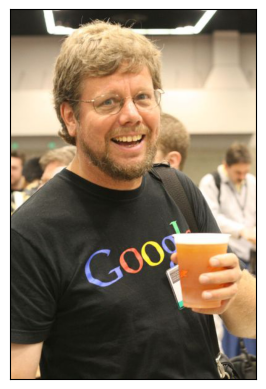

In [44]:
img = mpimg.imread('images/Guido_van_Rossum.jpg')
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()

### Zad 9.

Napisz funckje do przetwarzania obrazu do skali szarości wg wzoru:

$$ 0.2126 \times R + 0.7152 \times  G + 0.0722 \times B $$

In [47]:
def grayScale(img):
    target_img = np.zeros((img.shape[0],img.shape[1],1))
    target_img[:,:,0] = 0.2126*img[:,:,0] + 0.7152*img[:,:,1] + 0.0722*img[:,:,2]
    return target_img

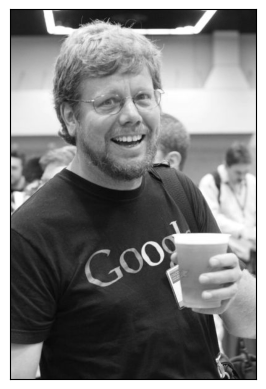

In [48]:
plt.imshow(grayScale(img),cmap='gray');
plt.xticks([])
plt.yticks([])
plt.show()

### Zadanie 10.

Wyłącznie za pomocą metod numpy napisz kod do interpolacji liniowej pomiędzy parą punktów (dowolnej wymiarowości) wg wzoru:

$$ x_i = \lambda x_1 + (1 - \lambda) x_2$$

Kod powinien od razu generować interpolacje dla wielu wartości $\lambda$, np dla 10 różnych $\lambda \in \{0, 0.1, 0.2, \dots, 1\}$

In [39]:
x1 = np.array([1, 2, 3])
x2 = np.array([4, 5, 6])
lambdas = np.linspace(0, 1, 10)
xi = lambdas.reshape(-1,1)*x1 + (1-lambdas.reshape(-1,1))*x2

In [40]:
xi

array([[4.        , 5.        , 6.        ],
       [3.66666667, 4.66666667, 5.66666667],
       [3.33333333, 4.33333333, 5.33333333],
       [3.        , 4.        , 5.        ],
       [2.66666667, 3.66666667, 4.66666667],
       [2.33333333, 3.33333333, 4.33333333],
       [2.        , 3.        , 4.        ],
       [1.66666667, 2.66666667, 3.66666667],
       [1.33333333, 2.33333333, 3.33333333],
       [1.        , 2.        , 3.        ]])